# Lecture 8

In [1]:
%run set_env.py
%matplotlib inline

Check versions:
  numpy version     :'1.20.1'
  matplotlib version:'3.3.4'


## Linear Algebra

Numpy contains a <font color="red"><b>few basic linear algebra</b></font> routines.<br>
They can be found in the following modules:<br>
* numpy
* numpy.linalg

The module <font color="red"><b>numpy</b></font> possesses a few functions.<br> 
Among them you will find:
* numpy.dot: 
  * $1$D : Dot-product  
  * $2$D : Matrix multiplication (can also use '**@**' operator)  
* numpy.kron: Kronecker product
* numpy.trace: Trace of a matrix
* numpy.transpose: Transpose (you can also use .T)

Other useful functions can be found in the module <font color="red"><b>numpy.linalg</b></font>, such as:
* numpy.linalg.matrix_power: $A^n$
* numpy.linalg.cholesky : **Cholesky** decomposition
* numpy.linalg.svd : **Singular Value Decomposition**
* numpy.linalg.det : Determinant of matrix
* numpy.linalg.solve: Solves a system of equations, i.e.:
  $\begin{equation*} A \, X = B \end{equation*}$
* numpy.linalg.inv : **Inversion** of a non-singular matrix $A$
* numpy.linalg.eig : To calculate the eigenvalues/eigenvectors of a square matrix
* numpy.linalg.eigh: To calculate the eigenvalues/eigenvectors of a **Hermitian** matrix
* ...

<b>Note:</b>
* A more complete set of linear algebra routines can be found in Scipy
  * e.g.: LU decomposition, Schur decomposition, etc.
  * <font color="green"><b>import scipy.linalg</b></font> 
* numpy.linalg comes with its own Error Type: <font color="green"><b>LinAlgError</b></font>

#### Examples:

##### Eigenvalues & Eigenvectors of a Matrix

In [3]:
# Eigenvalues & eigenvectors
a=np.array([[  9.  ,   8.1 ,  12.6 ,  -3.9 ],
            [  8.1 ,   9.54,  13.14,   0.39],
            [ 12.6 ,  13.14,  70.92,  36.54],
            [ -3.9 ,   0.39,  36.54,  52.05]])
print(f"  a:\n{a}\n".format(a))

w,v=la.eig(a)
print(f"    Eigenvalues:\n{w}\n")
print(f"    Eigen Vectors:\n{v}\n\n")

  a:
[[ 9.    8.1  12.6  -3.9 ]
 [ 8.1   9.54 13.14  0.39]
 [12.6  13.14 70.92 36.54]
 [-3.9   0.39 36.54 52.05]]

    Eigenvalues:
[101.29629647  33.2498673    0.7209184    6.24291783]

    Eigen Vectors:
[[-0.09497345  0.44781581  0.79797851  0.39200936]
 [-0.12489426  0.36707873 -0.57484312  0.72056229]
 [-0.79624688  0.40727038 -0.11035191 -0.43352532]
 [-0.58427081 -0.70628963  0.14355534  0.37306092]]




##### Cholesky decomposition of a Hermitean positive definite matrix

Let A be a Hermitean **AND** positive definite matrix, then the Cholesky of $A$ is:

$\begin{equation}
A  =  L\,L^{\dagger}
\end{equation}$

In [4]:
# a:
#   Matrix is Real & Symmetric => Hermitean 
#   All the eigenvalues(a) > 0. -> positive definite

l = la.cholesky(a)
print(f"    Cholesky decomposition: a=l.l^H\n{l}\n")
print(f"    Check:\n{np.dot(l,l.T)}\n")

    Cholesky decomposition: a=l.l^H
[[ 3.   0.   0.   0. ]
 [ 2.7  1.5  0.   0. ]
 [ 4.2  1.2  7.2  0. ]
 [-1.3  2.6  5.4  3.8]]

    Check:
[[ 9.    8.1  12.6  -3.9 ]
 [ 8.1   9.54 13.14  0.39]
 [12.6  13.14 70.92 36.54]
 [-3.9   0.39 36.54 52.05]]



##### Single Value Decomposition (SVD):

In [5]:
m=np.array([[1,0,0,0,2],
             [0,0,3,0,0],
             [0,0,0,0,0],
             [0,4,0,0,0]])
print(f"  m:\n{m}\n")
U,s,Vh=la.svd(m)
d = np.zeros((4,5))
d[:4,:4] = np.diag(s)

print(f"    SVD : m=U.s.Vh")
print(f"      U            :\n{U}\n")
print(f"      s (diagonal) :\n{s}\n")
print(f"      d            :\n{d}\n")
print(f"      Vh           :\n{Vh}\n\n")

print(f"    Check SVD:")
print(f"      U.shape:{U.shape}")
print(f"      s.shape:{s.shape}")
print(f"      d.shape:{d.shape}")
print(f"      V.shape:{Vh.shape}")

# Reconstruction of m
mres = np.dot(U,np.dot(d,Vh))
print(f"  mres:\n{mres}\n")
err = np.sqrt(np.sum(m -mres)**2)
print(f"  err:{err:12.8f}\n")

  m:
[[1 0 0 0 2]
 [0 0 3 0 0]
 [0 0 0 0 0]
 [0 4 0 0 0]]

    SVD : m=U.s.Vh
      U            :
[[ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 1.  0.  0.  0.]]

      s (diagonal) :
[4.         3.         2.23606798 0.        ]

      d            :
[[4.         0.         0.         0.         0.        ]
 [0.         3.         0.         0.         0.        ]
 [0.         0.         2.23606798 0.         0.        ]
 [0.         0.         0.         0.         0.        ]]

      Vh           :
[[-0.          1.          0.          0.          0.        ]
 [-0.          0.          1.          0.          0.        ]
 [ 0.4472136   0.          0.          0.          0.89442719]
 [ 0.          0.          0.          1.          0.        ]
 [-0.89442719  0.          0.          0.          0.4472136 ]]


    Check SVD:
      U.shape:(4, 4)
      s.shape:(4,)
      d.shape:(4, 5)
      V.shape:(5, 5)
  mres:
[[1. 0. 0. 0. 2.]
 [0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0.]
 [

## FFT

The module numpy.fft contains <font color="red"><b>discrete fourier</b></font> transforms.

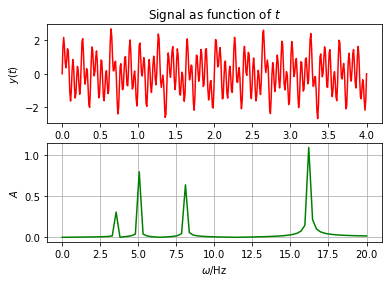

In [6]:
from math import pi

tott=4.0  # Total time
dt=1./100. # Sampling rate
t=np.linspace(0,tott,int(tott/dt))
s=0.30*np.sin(2*pi*3.5*t)  +0.80*np.sin(2*pi*5.0*t) + \
  0.65*np.sin(2*pi*8.0*t) + 1.15*np.sin(2*pi*16.0*t)
S=ff.fft(s)
n=S.size/2
amp=np.abs(S)/n
freq=np.linspace(0,80,80)/(2*n*dt)

fig=plt.figure()
ax1=fig.add_subplot(211)
ax1.plot(t,s,color='red')
ax1.set_xlabel(r'$t$/s')
ax1.set_ylabel(r'$y(t)$')
ax1.set_title(r'Signal as function of $t$')
ax2=fig.add_subplot(212)
ax2.plot(freq,amp[:80],color='green')
ax2.set_xlabel(r'$\omega$/Hz')
ax2.set_ylabel(r'$A$')
plt.grid(True);

## Random Number Generation

* The numpy random module contains funtions to generate random numbers 
  following certain distributions:
  * uniform distributions:
    * numpy.random.random: Uniform distribution [0,1[
    * numpy.random.randint(low,high,..): Random integers from the "discrete uniform" distribution
    * ...
  * beta
  * binomial
  * cauchy (Lorentz)
  * chisquare
  * exponential
  * gamma
  * normal
  * poisson
  * ...
 
* If you want to reproduce a sequence of random numbers, use the **seed()** function. 

##### Example: Standard Cauchy Distribution / Standard Lorentz Distribution

$\begin{equation*}
P(x; x_0, \gamma) = \frac{1}{\pi \gamma \bigl[ 1+
              (\frac{x-x_0}{\gamma})^2 \bigr] }
\end{equation*}$   

where:<br>
* $x_0$ = 0 
* $\gamma$=1


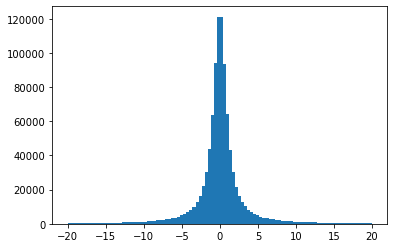

In [7]:
SZ = 1000000
sample = rnd.standard_cauchy(SZ);
sample = sample[(sample>-20) & (sample<20)]
plt.hist(sample,bins=100);

##### Example: Use of seed function (to reproduce set)

In [8]:
# Set seed
rnd.seed(12)
x = rnd.normal(loc=5,scale=2.0,size=(5,4))
print(f" x:\n{x}")

# Reset seed
rnd.seed(12)
y = rnd.normal(loc=5,scale=2.0,size=(5,4))
print(f" y:\n{y}")

 x:
[[ 5.94597166  3.63714824  5.48487899  1.59852873]
 [ 6.50628567  1.93055732  5.01025416  4.75954466]
 [ 3.38603624 10.74363879  3.80435416  5.94491399]
 [ 7.19191224  2.5696624   7.68471274  4.75570042]
 [ 7.02503095  3.17226171  2.94093959  7.4195929 ]]
 y:
[[ 5.94597166  3.63714824  5.48487899  1.59852873]
 [ 6.50628567  1.93055732  5.01025416  4.75954466]
 [ 3.38603624 10.74363879  3.80435416  5.94491399]
 [ 7.19191224  2.5696624   7.68471274  4.75570042]
 [ 7.02503095  3.17226171  2.94093959  7.4195929 ]]


## Special functions:

* There is a numpy module containing a <font color="red"><b>limited array</b></font> of special functions i.e.<br>
  * import numpy.polynomial.{chebyshev, hermite, laguerre, legendre}
* The <font color="green"><b>scipy package (scipy.special)</b></font> has a wider variety of special functions:<br>
  * import scipy.special

###### Exercise:


1. Exercise 1:<br>
  Let A be a matrix given by:
$\begin{pmatrix}
  3 & 1 & 1 \\
  2 & 4 & 2 \\
  1 & 1 & 3
\end{pmatrix}$
  
   - Calculate the matrix exponential: $e^{A}$.<br>
     Hints:<br>
     * The Taylor expansion of $e^x$ is given by:
        $\begin{eqnarray}  
        e^x & = & \sum_{n=0}^{\infty} \frac{x^n}{n!} \nonumber 
        \end{eqnarray}$
     
     * Use the diagonalization of the matrix A.
   - You can check your result using the matrix exponential function 
     (<font color="green"><b>expm</b></font>) 
     from <font color="green"><b>scipy.linalg</b></font>.
    
2. Exercise 2: Simulation of Brownian motion/Wiener process<br>

  The [standard Brownian motion](https://en.wikipedia.org/wiki/Brownian_motion) or [Wiener process](https://en.wikipedia.org/wiki/Wiener_process) is a [Gaussian process](https://en.wikipedia.org/wiki/Gaussian_process) ($X_t$, $t\geq 0$)<br> 
  where:
  \begin{eqnarray}
     \mathbb{E}[X_t] & = & 0 \\
    \mathrm{Cov}(X_t,X_s)&= &\min(s,t) 
  \end{eqnarray}

  From the above equations it follows that:
  - $\mathrm{Cov}$ is a symmetric matrix
  - $\mathrm{Cov}$ is [positive semi-definite](https://en.wikipedia.org/wiki/Definite_matrix) (all eigenvalues   $\lambda_i \geq 0$)

  The standard Brownian motion can be simulated in different ways.<br>
  **One-way** is based on the Cholesky decomposition of the covariance matrix:<br>
  - For the interval $\tau =[0,1]$, select $n$ equidistant intervals $\Rightarrow$ $\Delta t = 1/n$ 
  - Generate the $n \times n$ $\mathrm{Cov}$ matrix where $\mathrm{Cov}(X_t,X_s)= \min(s,t)$ ($1\leq s,t \leq n$)<br>
    *Note*: <b><font color="red">Exclude</font></b> from $\mathrm{Cov}$ $X_0$ (i.e corresponding to the point $0$ in the interval) 
  - Perform a **Cholesky** decomposition of the covariance matrix $\mathrm{Cov}:= A.A^T$
  - Sample a vector of $n$ [IID](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables) standard Gaussians $Z:=(Z_1,Z_2,\ldots, Z_n)^T$ where<br>
  $Z_i \sim N(0,1)$ and $ i \in \{1,\ldots,n\}$.
  - The vector $X:=A Z$ where $X:=(X_1,X_2,\ldots, X_n)^T$ <br>
  $\mathrm{Cov}(X)=A.\mathbb{1}_{n \times n}A^T$ where $\mathbb{1}_{n \times n}$ stands for the $n \times n$ identity matrix.
  - Add $X_0=0$.
Each vector $(X_0,X_1,\ldots,X_n)^T$ is known as a *Brownian path*.


* Generate $10$ Brownian paths/simulations and plot them.<br>
  Use $n=100$ equidistant intervals on $[0,1]$.

In [1]:
# %load ../solutions/ex8.py